<a href="https://colab.research.google.com/github/Mercymerine/Machine_learning2/blob/main/Air_quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install openml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 3.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 31.3 MB/s eta 0:00:00
  Created wheel for openml: filename=openml-0.14.2-py3-none-any.whl size=158701 sha256=4e5894e0a85fc273651055128e70be3625b0ded2d893fdcc50bc4fe88f4ce5d3
  Stored in directory: /root/.cache/pip/wheels/2e/4e/af/5e721761d86375dbca82e63cc2470019e97815bc39f11451ea
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11717 sha256=4aa3b8b28b047401296c320c674112d81ca26ec64dee55b430099453f5be8f6f
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built openml liac-arff


### **Objective:** The objective of this project assignment is to develop a machine learning model that predicts future air quality levels based on historical air quality data and relevant environmental factors.

## **Packages**

In [2]:
import arff
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor

## **Importing Dataset**

In [4]:
#Load ARFF file
with open('/content/air_dataset.arff', 'r') as file:
  dataset = arff.load(file)

#Convert to DataFrame
air = pd.DataFrame(dataset['data'], columns=[attr[0] for attr in dataset['attributes']])

air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## **Data Cleaning**

In [5]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    412029 non-null  float64
 6   PM10     414319 non-null  float64
 7   SO2      411747 non-null  float64
 8   NO2      408652 non-null  float64
 9   CO       400067 non-null  float64
 10  O3       407491 non-null  float64
 11  TEMP     420370 non-null  float64
 12  PRES     420375 non-null  float64
 13  DEWP     420365 non-null  float64
 14  RAIN     420378 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420450 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


### **Dealing with missing values**

In [6]:
air.isnull().sum()

No             0
year           0
month          0
day            0
hour           0
PM2.5       8739
PM10        6449
SO2         9021
NO2        12116
CO         20701
O3         13277
TEMP         398
PRES         393
DEWP         403
RAIN         390
wd          1822
WSPM         318
station        0
dtype: int64

In [7]:
missing_percent = air.isnull().mean()*100
missing_percent

No         0.000000
year       0.000000
month      0.000000
day        0.000000
hour       0.000000
PM2.5      2.076916
PM10       1.532674
SO2        2.143937
NO2        2.879497
CO         4.919813
O3         3.155421
TEMP       0.094589
PRES       0.093401
DEWP       0.095777
RAIN       0.092688
wd         0.433018
WSPM       0.075576
station    0.000000
dtype: float64

In [8]:
air.columns

Index(['No', 'year', 'month', 'day', 'hour', 'PM2.5', 'PM10', 'SO2', 'NO2',
       'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'wd', 'WSPM', 'station'],
      dtype='object')

In [9]:
air.nunique()

No         35064
year           5
month         12
day           31
hour          24
PM2.5        888
PM10        1084
SO2          691
NO2         1212
CO           132
O3          1598
TEMP        2034
PRES         726
DEWP         645
RAIN         253
wd            16
WSPM         117
station       12
dtype: int64

<Axes: >

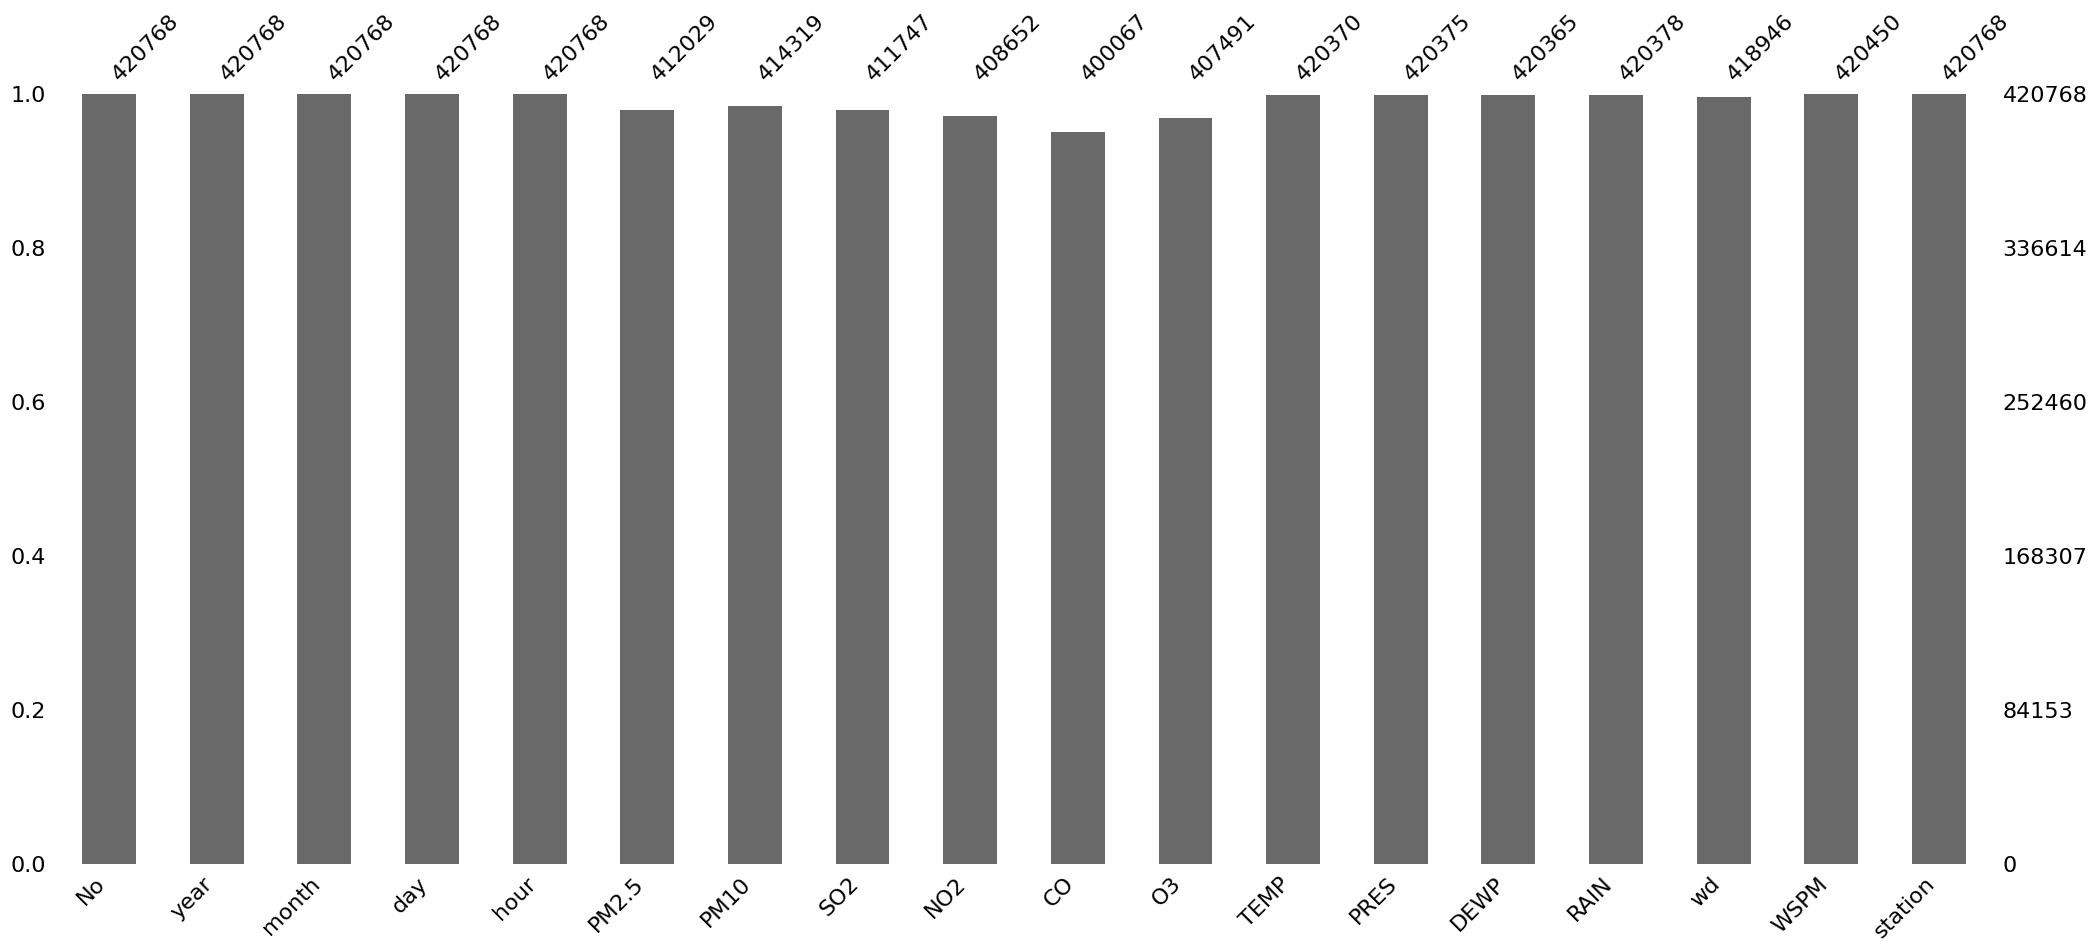

In [10]:
msno.bar(air)

<Axes: >

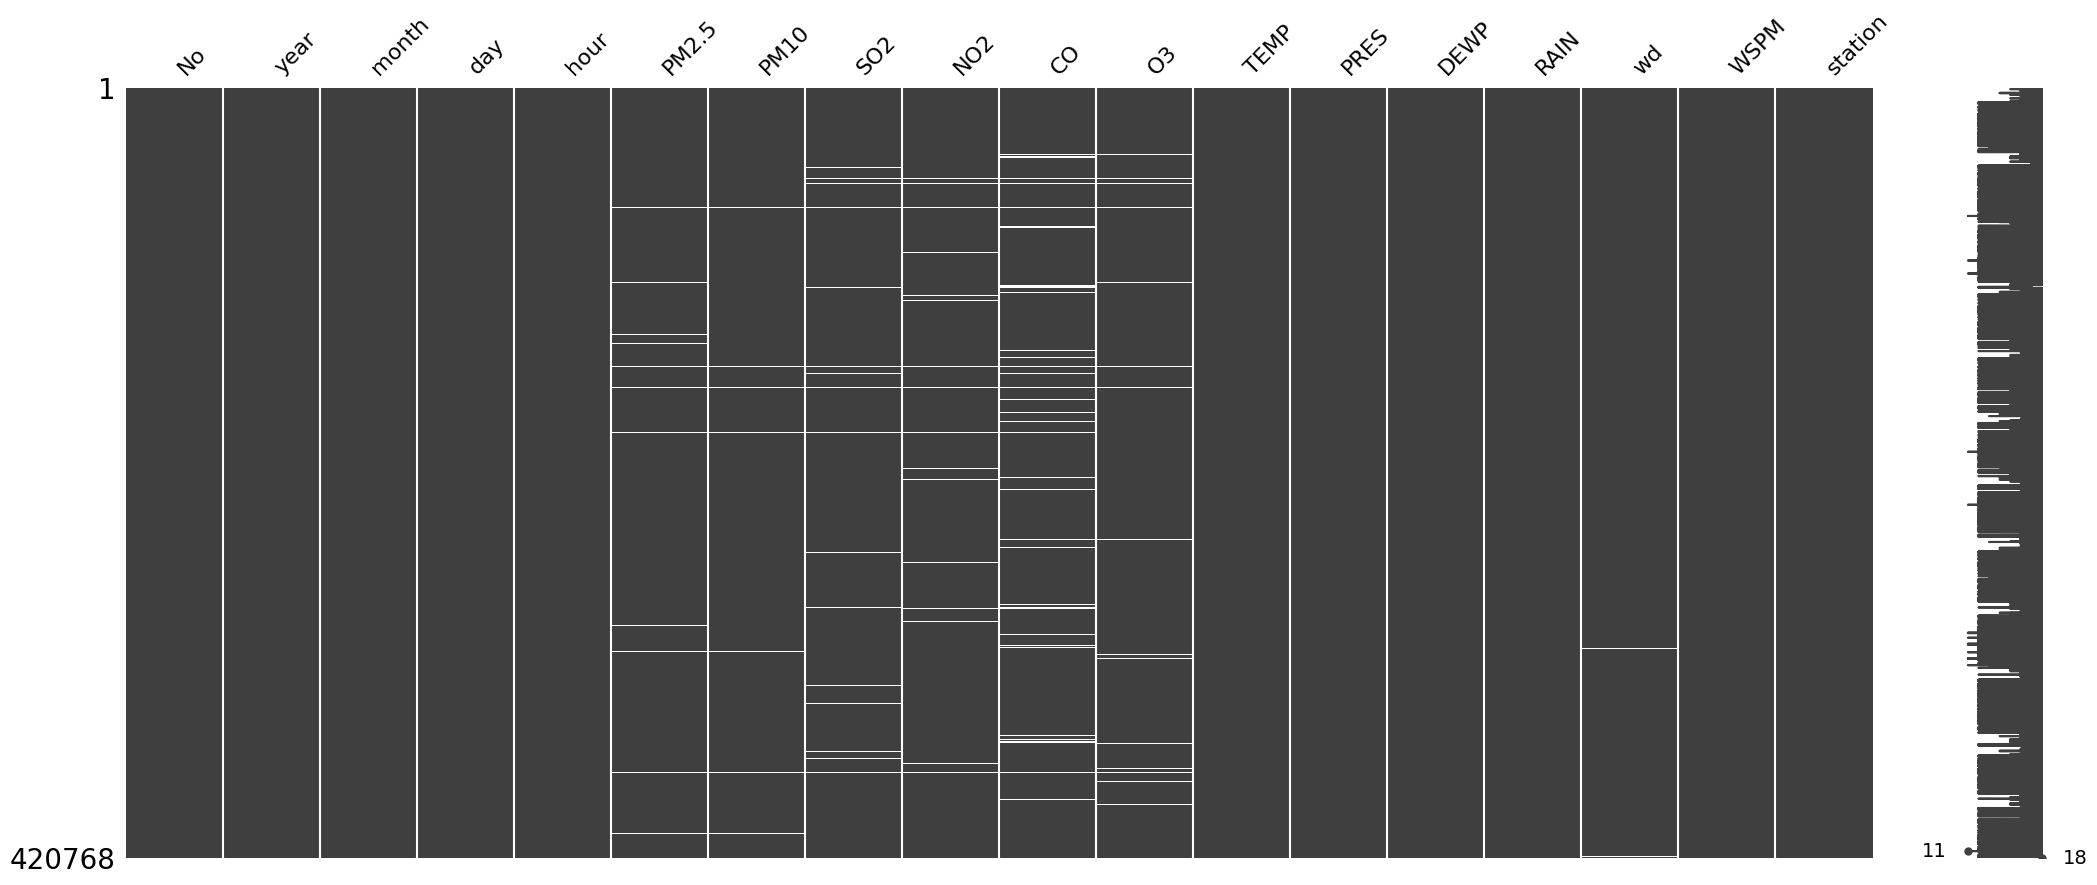

In [11]:
msno.matrix(air)

From the above, I do think  the values are  missing at random at random(MAR) meaning the values are missing due to observations from other variables

<Axes: >

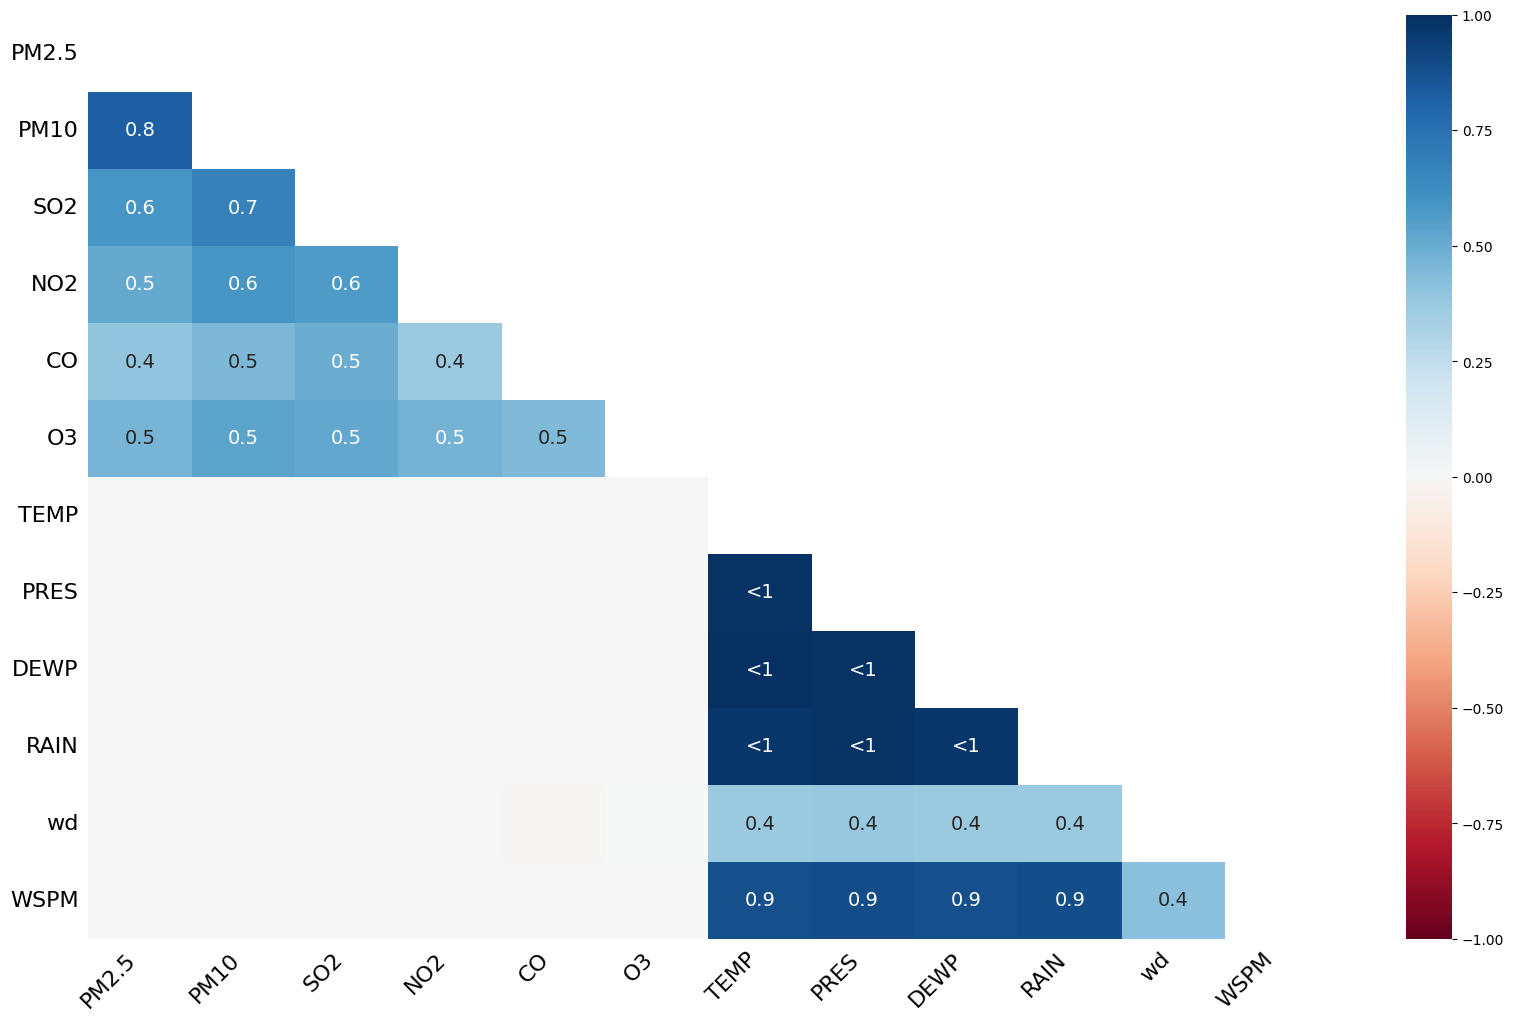

In [12]:
msno.heatmap(air)

## **Dealing with PM2.5 missing values**

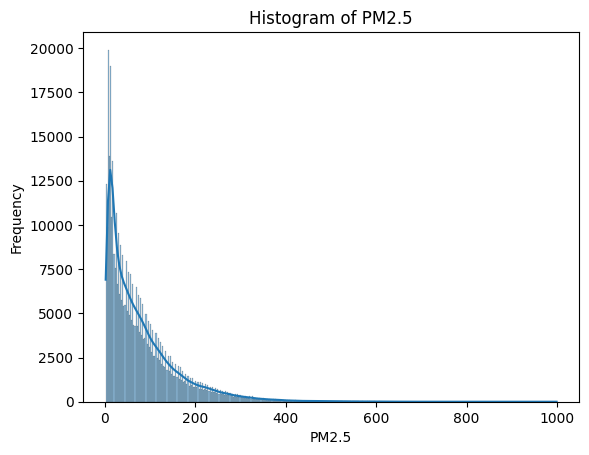

In [13]:
sns.histplot(data=air, x="PM2.5", kde=True)

plt.title("Histogram of PM2.5")
plt.xlabel("PM2.5")
plt.ylabel("Frequency")
plt.show()

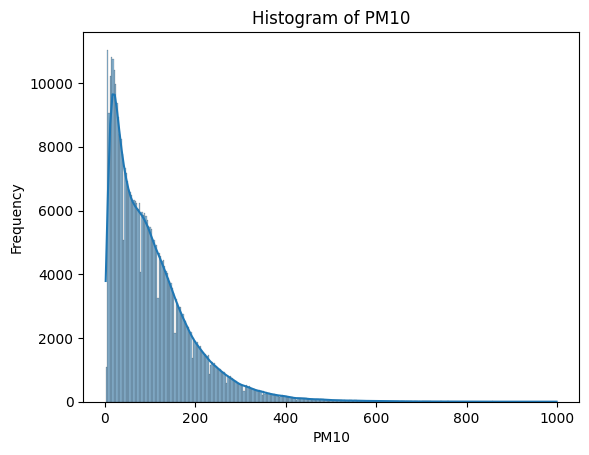

In [14]:
sns.histplot(data=air, x="PM10", kde=True)

plt.title("Histogram of PM10")
plt.xlabel("PM10")
plt.ylabel("Frequency")
plt.show()

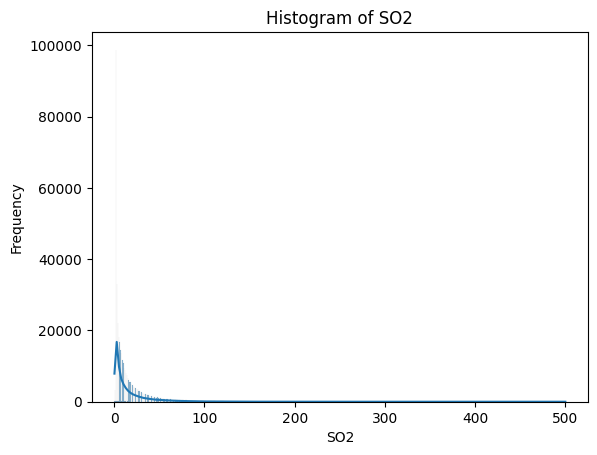

In [15]:
sns.histplot(data=air, x="SO2", kde=True)

plt.title("Histogram of SO2")
plt.xlabel("SO2")
plt.ylabel("Frequency")
plt.show()

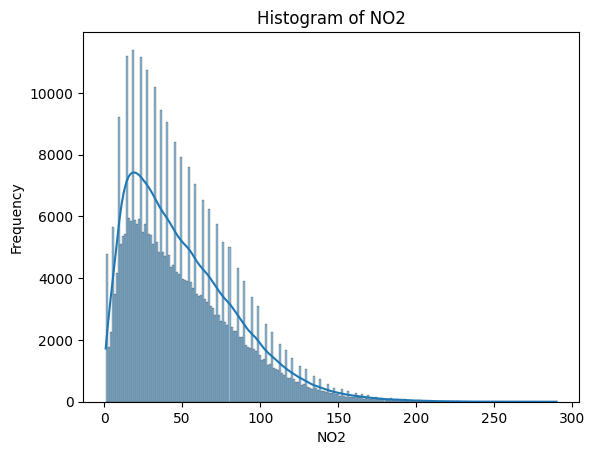

In [16]:
sns.histplot(data=air, x="NO2", kde=True)

plt.title("Histogram of NO2")
plt.xlabel("NO2")
plt.ylabel("Frequency")
plt.show()

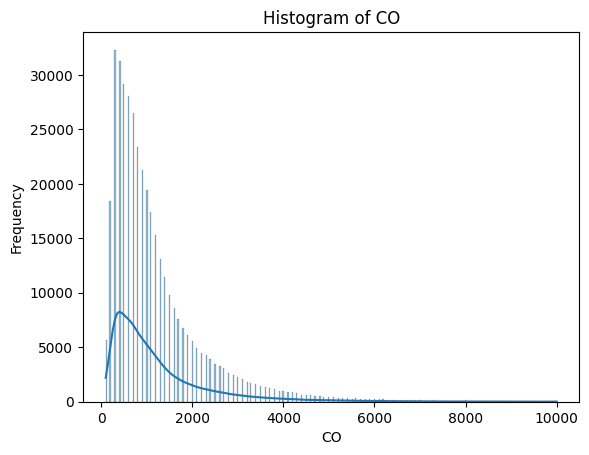

In [17]:
sns.histplot(data=air, x="CO", kde=True)

plt.title("Histogram of CO")
plt.xlabel("CO")
plt.ylabel("Frequency")
plt.show()

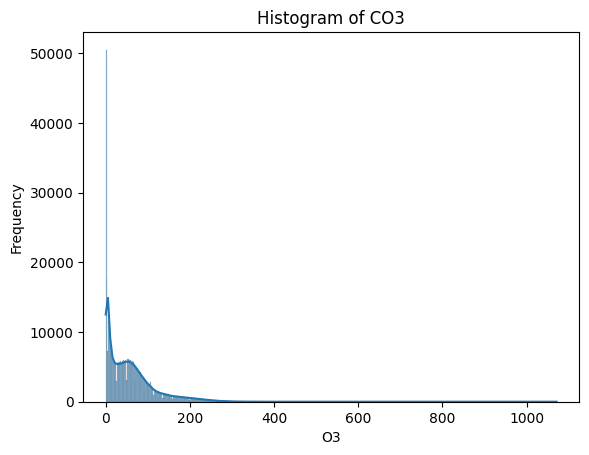

In [18]:
sns.histplot(data=air, x="O3", kde=True)

plt.title("Histogram of CO3")
plt.xlabel("O3")
plt.ylabel("Frequency")
plt.show()

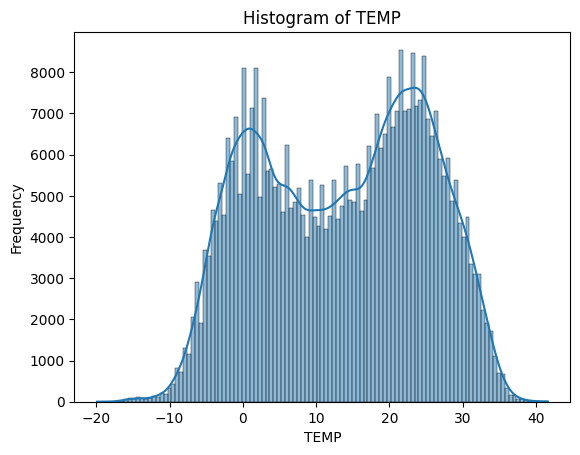

In [19]:
sns.histplot(data=air, x="TEMP", kde=True)

plt.title("Histogram of TEMP")
plt.xlabel("TEMP")
plt.ylabel("Frequency")
plt.show()

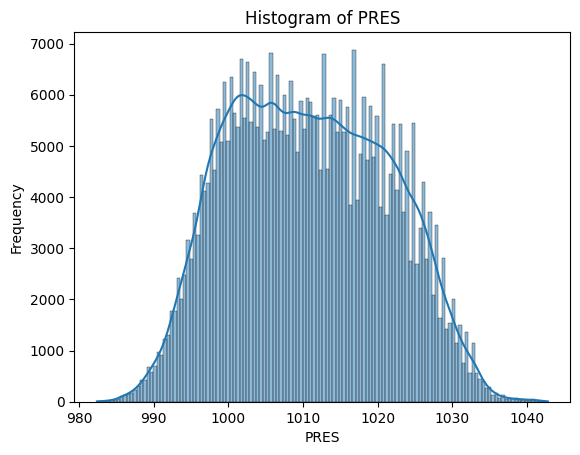

In [20]:
sns.histplot(data=air, x="PRES", kde=True)

plt.title("Histogram of PRES")
plt.xlabel("PRES")
plt.ylabel("Frequency")
plt.show()

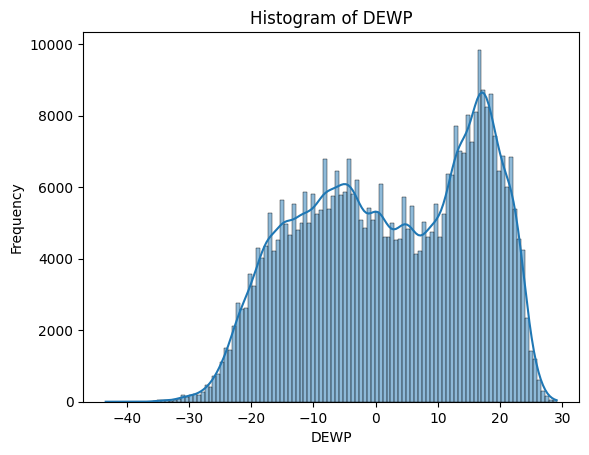

In [21]:
sns.histplot(data=air, x="DEWP", kde=True)

plt.title("Histogram of DEWP")
plt.xlabel("DEWP")
plt.ylabel("Frequency")
plt.show()

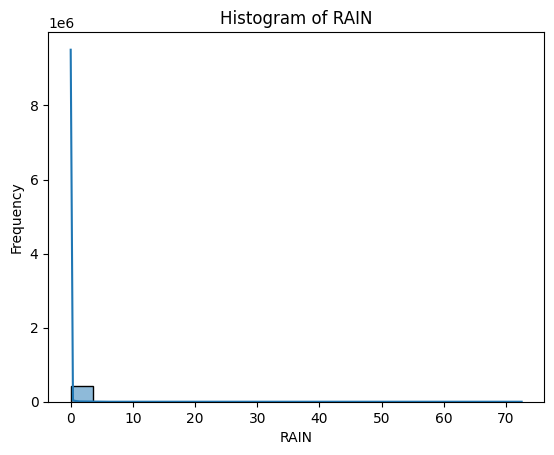

In [22]:
sns.histplot(data=air, x="RAIN", kde=True)

plt.title("Histogram of RAIN")
plt.xlabel("RAIN")
plt.ylabel("Frequency")
plt.show()

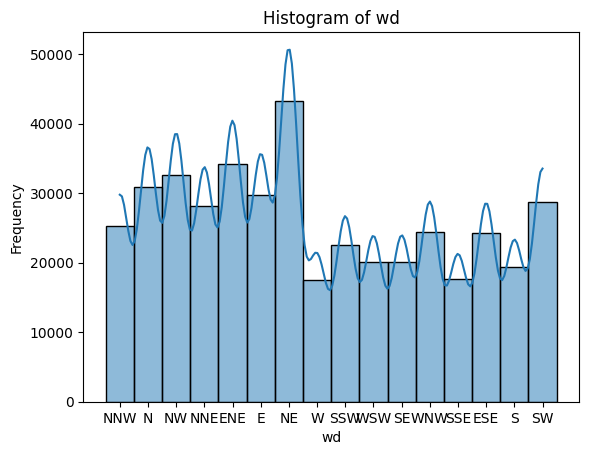

In [23]:
sns.histplot(data=air, x="wd", kde=True)

plt.title("Histogram of wd")
plt.xlabel("wd")
plt.ylabel("Frequency")
plt.show()

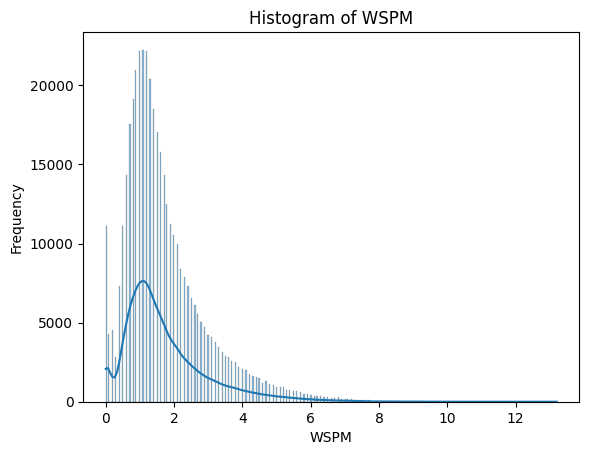

In [24]:
sns.histplot(data=air, x="WSPM", kde=True)

plt.title("Histogram of WSPM")
plt.xlabel("WSPM")
plt.ylabel("Frequency")
plt.show()

In [25]:
air.describe()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,WSPM
count,420768.000000,420768.000000,420768.000000,420768.000000,420768.000000,412029.000000,414319.000000,411747.000000,408652.000000,400067.000000,407491.000000,420370.000000,420375.000000,420365.000000,420378.000000,420450.000000
mean,17532.500000,2014.662560,6.522930,15.729637,11.500000,79.793428,104.602618,15.830835,50.638586,1230.766454,57.372271,13.538976,1010.746982,2.490822,0.064476,1.729711
std,10122.116943,1.177198,3.448707,8.800102,6.922195,80.822391,91.772426,21.650603,35.127912,1160.182716,56.661607,11.436139,10.474055,13.793847,0.821004,1.246386
min,1.000000,2013.000000,1.000000,1.000000,0.000000,2.000000,2.000000,0.285600,1.026500,100.000000,0.214200,-19.900000,982.400000,-43.400000,0.000000,0.000000
25%,8766.750000,2014.000000,4.000000,8.000000,5.750000,20.000000,36.000000,3.000000,23.000000,500.000000,11.000000,3.100000,1002.300000,-8.900000,0.000000,0.900000
50%,17532.500000,2015.000000,7.000000,16.000000,11.500000,55.000000,82.000000,7.000000,43.000000,900.000000,45.000000,14.500000,1010.400000,3.100000,0.000000,1.400000
75%,26298.250000,2016.000000,10.000000,23.000000,17.250000,111.000000,145.000000,20.000000,71.000000,1500.000000,82.000000,23.300000,1019.000000,15.100000,0.000000,2.200000
max,35064.000000,2017.000000,12.000000,31.000000,23.000000,999.000000,999.000000,500.000000,290.000000,10000.000000,1071.000000,41.600000,1042.800000,29.100000,72.500000,13.200000


In [26]:
#Replacing with the median
from sklearn.impute import SimpleImputer

numerical_columns = ['PM2.5', 'PM10',	'SO2', 'NO2', 'CO','O3', 'RAIN', 'WSPM']

imputer= SimpleImputer(strategy='median')

air[numerical_columns] = imputer.fit_transform(air[numerical_columns])

In [27]:
#Replacing with the mean
from sklearn.impute import SimpleImputer

numerical_columns = ['TEMP', 'PRES',	'DEWP']

imputer= SimpleImputer(strategy='mean')

air[numerical_columns] = imputer.fit_transform(air[numerical_columns])

In [28]:
air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 420768 entries, 0 to 420767
Data columns (total 18 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   No       420768 non-null  int64  
 1   year     420768 non-null  int64  
 2   month    420768 non-null  int64  
 3   day      420768 non-null  int64  
 4   hour     420768 non-null  int64  
 5   PM2.5    420768 non-null  float64
 6   PM10     420768 non-null  float64
 7   SO2      420768 non-null  float64
 8   NO2      420768 non-null  float64
 9   CO       420768 non-null  float64
 10  O3       420768 non-null  float64
 11  TEMP     420768 non-null  float64
 12  PRES     420768 non-null  float64
 13  DEWP     420768 non-null  float64
 14  RAIN     420768 non-null  float64
 15  wd       418946 non-null  object 
 16  WSPM     420768 non-null  float64
 17  station  420768 non-null  object 
dtypes: float64(11), int64(5), object(2)
memory usage: 57.8+ MB


In [29]:
air.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10          0
SO2           0
NO2           0
CO            0
O3            0
TEMP          0
PRES          0
DEWP          0
RAIN          0
wd         1822
WSPM          0
station       0
dtype: int64

In [30]:
mode_value = air['wd'].mode()[0]
air['wd'] = air['wd'].fillna(mode_value)

In [31]:
air.isnull().sum()

No         0
year       0
month      0
day        0
hour       0
PM2.5      0
PM10       0
SO2        0
NO2        0
CO         0
O3         0
TEMP       0
PRES       0
DEWP       0
RAIN       0
wd         0
WSPM       0
station    0
dtype: int64

In [32]:
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


## **EDA**

In [33]:
'''
plt.figure(figsize=(8, 6))
sns.heatmap(encoded_air, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Sample Heatmap')
plt.show()
'''

"\nplt.figure(figsize=(8, 6))\nsns.heatmap(encoded_air, annot=True, cmap='coolwarm', linewidths=0.5)\nplt.title('Sample Heatmap')\nplt.show()\n"

# **Feature Engineering**
I will be using the PM2.5 as the target variable. PM2.5 refers to tiny particles or droplets in the air that are 2.5 micrometers or less in width. These fine inhalable particles are a key indicator of air quality. Characteristics:

Diameter: 2.5 micrometers or smaller, about 30 times smaller than a human hair Inhalable: Can penetrate deep into the lungs, potentially causing health issues

Health Impacts:

Can exacerbate respiratory and cardiovascular diseases May increase risk of premature death, especially for sensitive populations

In [34]:
air.head()

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
1,2,2013,3,1,1,8.0,8.0,4.0,7.0,300.0,77.0,-1.1,1023.2,-18.2,0.0,N,4.7,Aotizhongxin
2,3,2013,3,1,2,7.0,7.0,5.0,10.0,300.0,73.0,-1.1,1023.5,-18.2,0.0,NNW,5.6,Aotizhongxin
3,4,2013,3,1,3,6.0,6.0,11.0,11.0,300.0,72.0,-1.4,1024.5,-19.4,0.0,NW,3.1,Aotizhongxin
4,5,2013,3,1,4,3.0,3.0,12.0,12.0,300.0,72.0,-2.0,1025.2,-19.5,0.0,N,2.0,Aotizhongxin


In [35]:
# Creating a datetime column with it as the index
# Combine year, month and day into a single datetime column
air['datetime'] = pd.to_datetime(air[['year', 'month', 'day', 'hour']])

# Set the new column as the index
air.set_index('datetime', inplace=True)

# Drop the original date and time columns
air.drop(['year', 'month', 'day', 'hour'], axis=1, inplace=True)

# Sort by the datetime index
air.sort_index(inplace=True)

air.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01,1,4.0,4.0,3.0,43.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01,1,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping


In [36]:
size = len(air) * 0.8
size

336614.4

In [37]:
air.shape

(420768, 14)

In [38]:
df_train = air.iloc[:int(size)]
df_test = air.iloc[int(size):]

In [39]:
df_train.shape

(336614, 14)

In [40]:
df_test.shape

(84154, 14)

In [41]:
from prophet import Prophet

In [42]:
df_train.head()

,No,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
datetime,,,,,,,,,,,,,,
2013-03-01,1,4.0,4.0,4.0,7.0,300.0,77.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Aotizhongxin
2013-03-01,1,6.0,6.0,4.0,8.0,300.0,81.0,-0.5,1024.5,-21.4,0.0,NNW,5.7,Tiantan
2013-03-01,1,4.0,4.0,3.0,43.0,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
2013-03-01,1,8.0,8.0,6.0,28.0,400.0,52.0,-0.7,1023.0,-18.8,0.0,NNW,4.4,Wanliu
2013-03-01,1,3.0,6.0,13.0,7.0,300.0,85.0,-2.3,1020.8,-19.7,0.0,E,0.5,Changping


In [43]:
df_train.reset_index(inplace=True)
df_test.reset_index(inplace=True)

In [44]:
df_prophet = df_train[['datetime', 'PM2.5']].rename(columns={'datetime': 'ds', 'PM2.5': 'y'})

In [45]:
model = Prophet()
model.fit(df_prophet)

DEBUG:cmdstanpy:input tempfile: /tmp/tmphia067ht/48mxy4up.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphia067ht/_oqfuqs5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=38181', 'data', 'file=/tmp/tmphia067ht/48mxy4up.json', 'init=/tmp/tmphia067ht/_oqfuqs5.json', 'output', 'file=/tmp/tmphia067ht/prophet_modelq6z6_c23/prophet_model-20240807035057.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:50:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:58:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [46]:
df_test_prophet = df_test[['datetime', 'PM2.5']].rename(columns={'datetime': 'ds', 'PM2.5': 'y'})

In [47]:
model = Prophet()
model.predict(df_test_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmphia067ht/n42uw253.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmphia067ht/bgxllnbt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40676', 'data', 'file=/tmp/tmphia067ht/n42uw253.json', 'init=/tmp/tmphia067ht/bgxllnbt.json', 'output', 'file=/tmp/tmphia067ht/prophet_modelwwzdls_2/prophet_model-20240807035842.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
03:58:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
03:59:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [53]:
forecast = model.predict(df_test_prophet)

In [54]:
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2016-05-12 19:00:00,41.866149,-57.917199,124.778013,41.866149,41.866149,-7.730851,-7.730851,-7.730851,4.20813,4.20813,4.20813,-11.938982,-11.938982,-11.938982,0.0,0.0,0.0,34.135297
1,2016-05-12 19:00:00,41.866149,-63.379397,124.926125,41.866149,41.866149,-7.730851,-7.730851,-7.730851,4.20813,4.20813,4.20813,-11.938982,-11.938982,-11.938982,0.0,0.0,0.0,34.135297
2,2016-05-12 19:00:00,41.866149,-61.584487,133.887600,41.866149,41.866149,-7.730851,-7.730851,-7.730851,4.20813,4.20813,4.20813,-11.938982,-11.938982,-11.938982,0.0,0.0,0.0,34.135297
3,2016-05-12 19:00:00,41.866149,-57.982827,126.475948,41.866149,41.866149,-7.730851,-7.730851,-7.730851,4.20813,4.20813,4.20813,-11.938982,-11.938982,-11.938982,0.0,0.0,0.0,34.135297
4,2016-05-12 19:00:00,41.866149,-66.245348,122.175068,41.866149,41.866149,-7.730851,-7.730851,-7.730851,4.20813,4.20813,4.20813,-11.938982,-11.938982,-11.938982,0.0,0.0,0.0,34.135297


In [48]:
'''
data['diff_passenger'] = data['passengers'].diff().dropna()
df['diff_passemger'].diff().dropna()
'''

"\ndata['diff_passenger'] = data['passengers'].diff().dropna()\ndf['diff_passemger'].diff().dropna()\n"

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


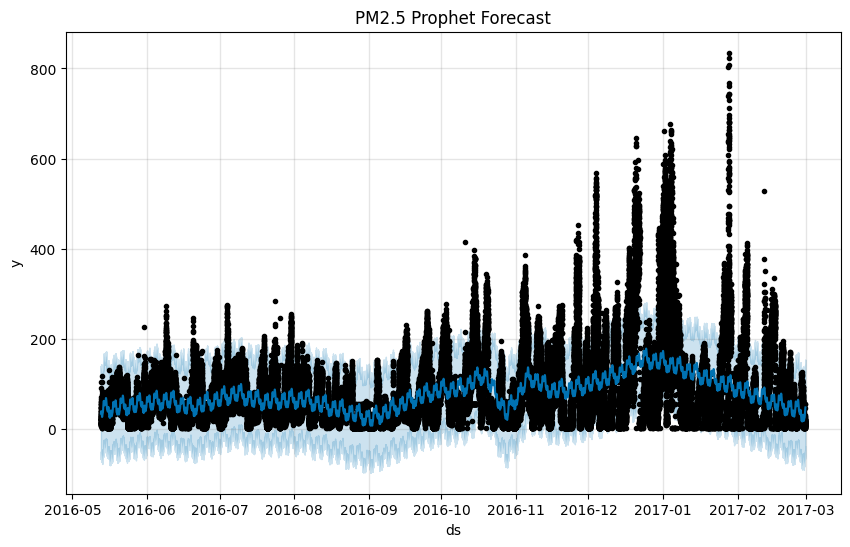

In [55]:
fig, ax = plt.subplots(figsize=(10, 6))
fig = model.plot(forecast, ax=ax)
ax.set_title('PM2.5 Prophet Forecast')
plt.show()

/usr/local/lib/python3.10/dist-packages/prophet/plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:397: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  artists += ax.plot(df_y['ds'].dt.to_pydatetime(), seas[name], ls='-',
/usr/local/lib/python3.10/dist-packages/prophet/plot.py:401: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.ar

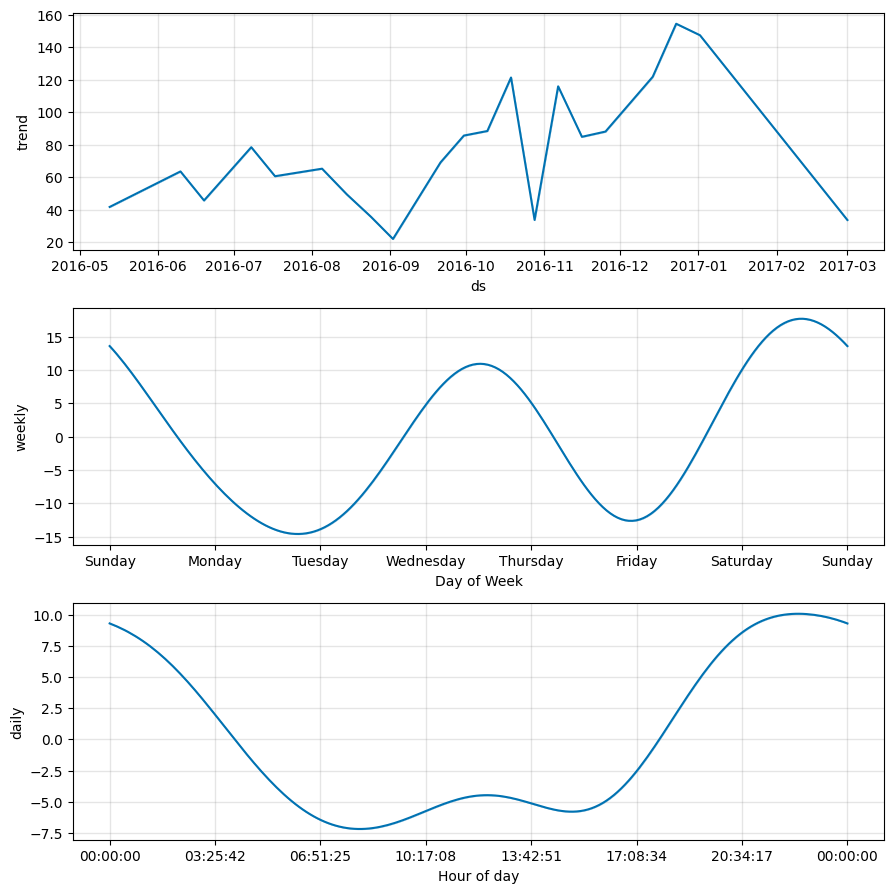

In [56]:
model.plot_components(forecast)
plt.show()